In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
df = pd.read_csv('../datas/emprego.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [94]:
df = pd.get_dummies(df, columns=['hsc_s'])
df['sexo'] = pd.factorize( df['gender'] )[0]
df['experiencia'] = pd.factorize( df['workex'] )[0]

In [95]:
x = df[['hsc_s_Arts', 'hsc_s_Commerce', 'hsc_s_Science', 'sexo', 'experiencia']]
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
randomdorest = RandomForestClassifier(n_estimators=100)

randomdorest.fit(X_train,y_train)

RandomForestClassifier()

In [98]:
predicao = randomdorest.predict(X_test)

In [99]:
print(confusion_matrix(y_test,predicao))
print(classification_report(y_test,predicao))

[[ 3 20]
 [ 5 37]]
              precision    recall  f1-score   support

  Not Placed       0.38      0.13      0.19        23
      Placed       0.65      0.88      0.75        42

    accuracy                           0.62        65
   macro avg       0.51      0.51      0.47        65
weighted avg       0.55      0.62      0.55        65



[Text(0.5277777777777778, 0.9, 'hsc_s_Science <= 0.5\ngini = 0.365\nsamples = 98\nvalue = [36, 114]\nclass = Placed'),
 Text(0.2777777777777778, 0.7, 'experiencia <= 0.5\ngini = 0.428\nsamples = 51\nvalue = [23, 51]\nclass = Placed'),
 Text(0.4027777777777778, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'sexo <= 0.5\ngini = 0.474\nsamples = 37\nvalue = [22, 35]\nclass = Placed'),
 Text(0.05555555555555555, 0.3, 'gini = 0.401\nsamples = 21\nvalue = [10, 26]\nclass = Placed'),
 Text(0.16666666666666666, 0.3, 'hsc_s_Arts <= 0.5\ngini = 0.49\nsamples = 16\nvalue = [12, 9]\nclass = Not Placed'),
 Text(0.1111111111111111, 0.1, 'gini = 0.488\nsamples = 14\nvalue = [11, 8]\nclass = Not Placed'),
 Text(0.2222222222222222, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Not Placed'),
 Text(0.4444444444444444, 0.5, 'sexo <= 0.5\ngini = 0.111\nsamples = 14\nvalue = [1, 16]\nclass = Placed'),
 Text(0.3888888888888889, 0.3, 'hsc_s_Commerce <= 0.5\ngini = 0.133\nsamples = 11\nvalue = [1, 13

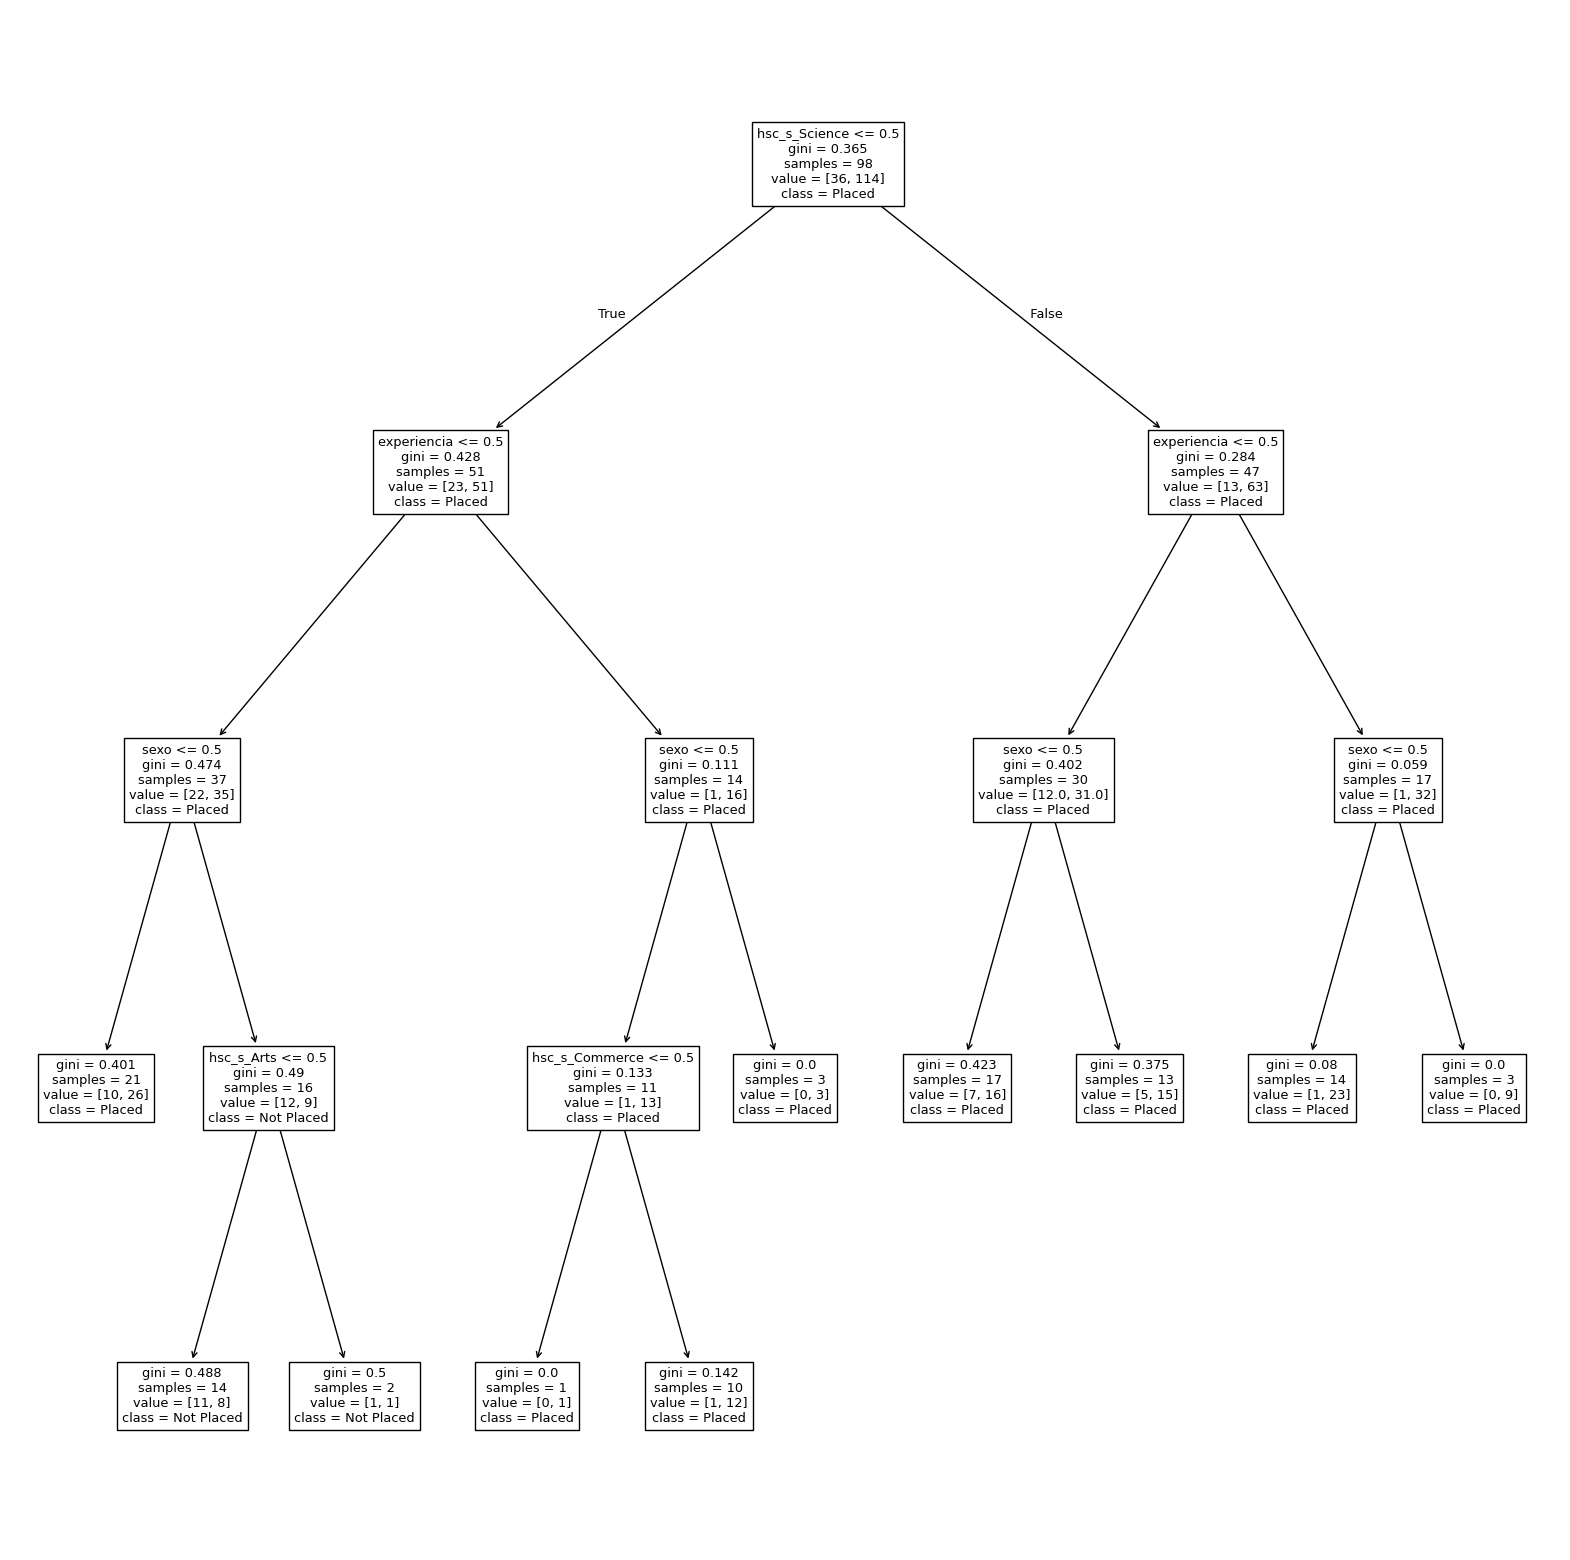

In [100]:
from sklearn import tree

features = list(x.columns)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(randomdorest.estimators_[0], feature_names=features, class_names=randomdorest.classes_)


Random Forest Regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor

df2 = df.dropna()

x = df2[['hsc_s_Arts', 'hsc_s_Commerce', 'hsc_s_Science', 'sexo', 'experiencia']]
y = df2['salary']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)

In [103]:
randomdoregressor = RandomForestRegressor(n_estimators=100)

randomdoregressor.fit(X_train,y_train)

RandomForestRegressor()

In [104]:
predicaoregressor = randomdoregressor.predict(X_test)
print(predicaoregressor)

[313278.93983283 245529.67790126 245529.67790126 285587.84762442
 292722.56596882 292722.56596882 285587.84762442 292722.56596882
 285587.84762442 292722.56596882 313278.93983283 313278.93983283
 301760.22434417 313278.93983283 313278.93983283 292722.56596882
 277262.10761461 285587.84762442 285587.84762442 276748.05037386
 301760.22434417 285587.84762442 285587.84762442 285587.84762442
 313278.93983283 292722.56596882 313278.93983283 276748.05037386
 285587.84762442 285587.84762442 285587.84762442 301760.22434417
 285587.84762442 292722.56596882 285587.84762442 313278.93983283
 285587.84762442 313278.93983283 292722.56596882 292722.56596882
 271775.12091959 285587.84762442 285587.84762442 313278.93983283
 245529.67790126]


In [105]:
from sklearn import metrics
import numpy as np
print('r2:', metrics.r2_score(y_test, predicaoregressor))
print('MAE:', metrics.mean_absolute_error(y_test, predicaoregressor))
print('MSE:', metrics.mean_squared_error(y_test, predicaoregressor))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicaoregressor)))

r2: 0.04195658195619767
MAE: 66655.53559907616
MSE: 15246167645.900892
RMSE: 123475.37262912346


[Text(0.631578947368421, 0.9, 'hsc_s_Arts <= 0.5\nsquared_error = 6298008294.844\nsamples = 69\nvalue = 288174.757'),
 Text(0.42105263157894735, 0.7, 'sexo <= 0.5\nsquared_error = 6671669533.726\nsamples = 64\nvalue = 291893.617'),
 Text(0.5263157894736842, 0.8, 'True  '),
 Text(0.21052631578947367, 0.5, 'hsc_s_Science <= 0.5\nsquared_error = 6155127116.036\nsamples = 39\nvalue = 301508.772'),
 Text(0.10526315789473684, 0.3, 'experiencia <= 0.5\nsquared_error = 4793118367.347\nsamples = 22\nvalue = 297714.286'),
 Text(0.05263157894736842, 0.1, 'squared_error = 5905061224.49\nsamples = 13\nvalue = 300714.286'),
 Text(0.15789473684210525, 0.1, 'squared_error = 3091454081.633\nsamples = 9\nvalue = 293214.286'),
 Text(0.3157894736842105, 0.3, 'experiencia <= 0.5\nsquared_error = 8262611570.248\nsamples = 17\nvalue = 307545.455'),
 Text(0.2631578947368421, 0.1, 'squared_error = 6270995555.556\nsamples = 11\nvalue = 295066.667'),
 Text(0.3684210526315789, 0.1, 'squared_error = 11481632653.06

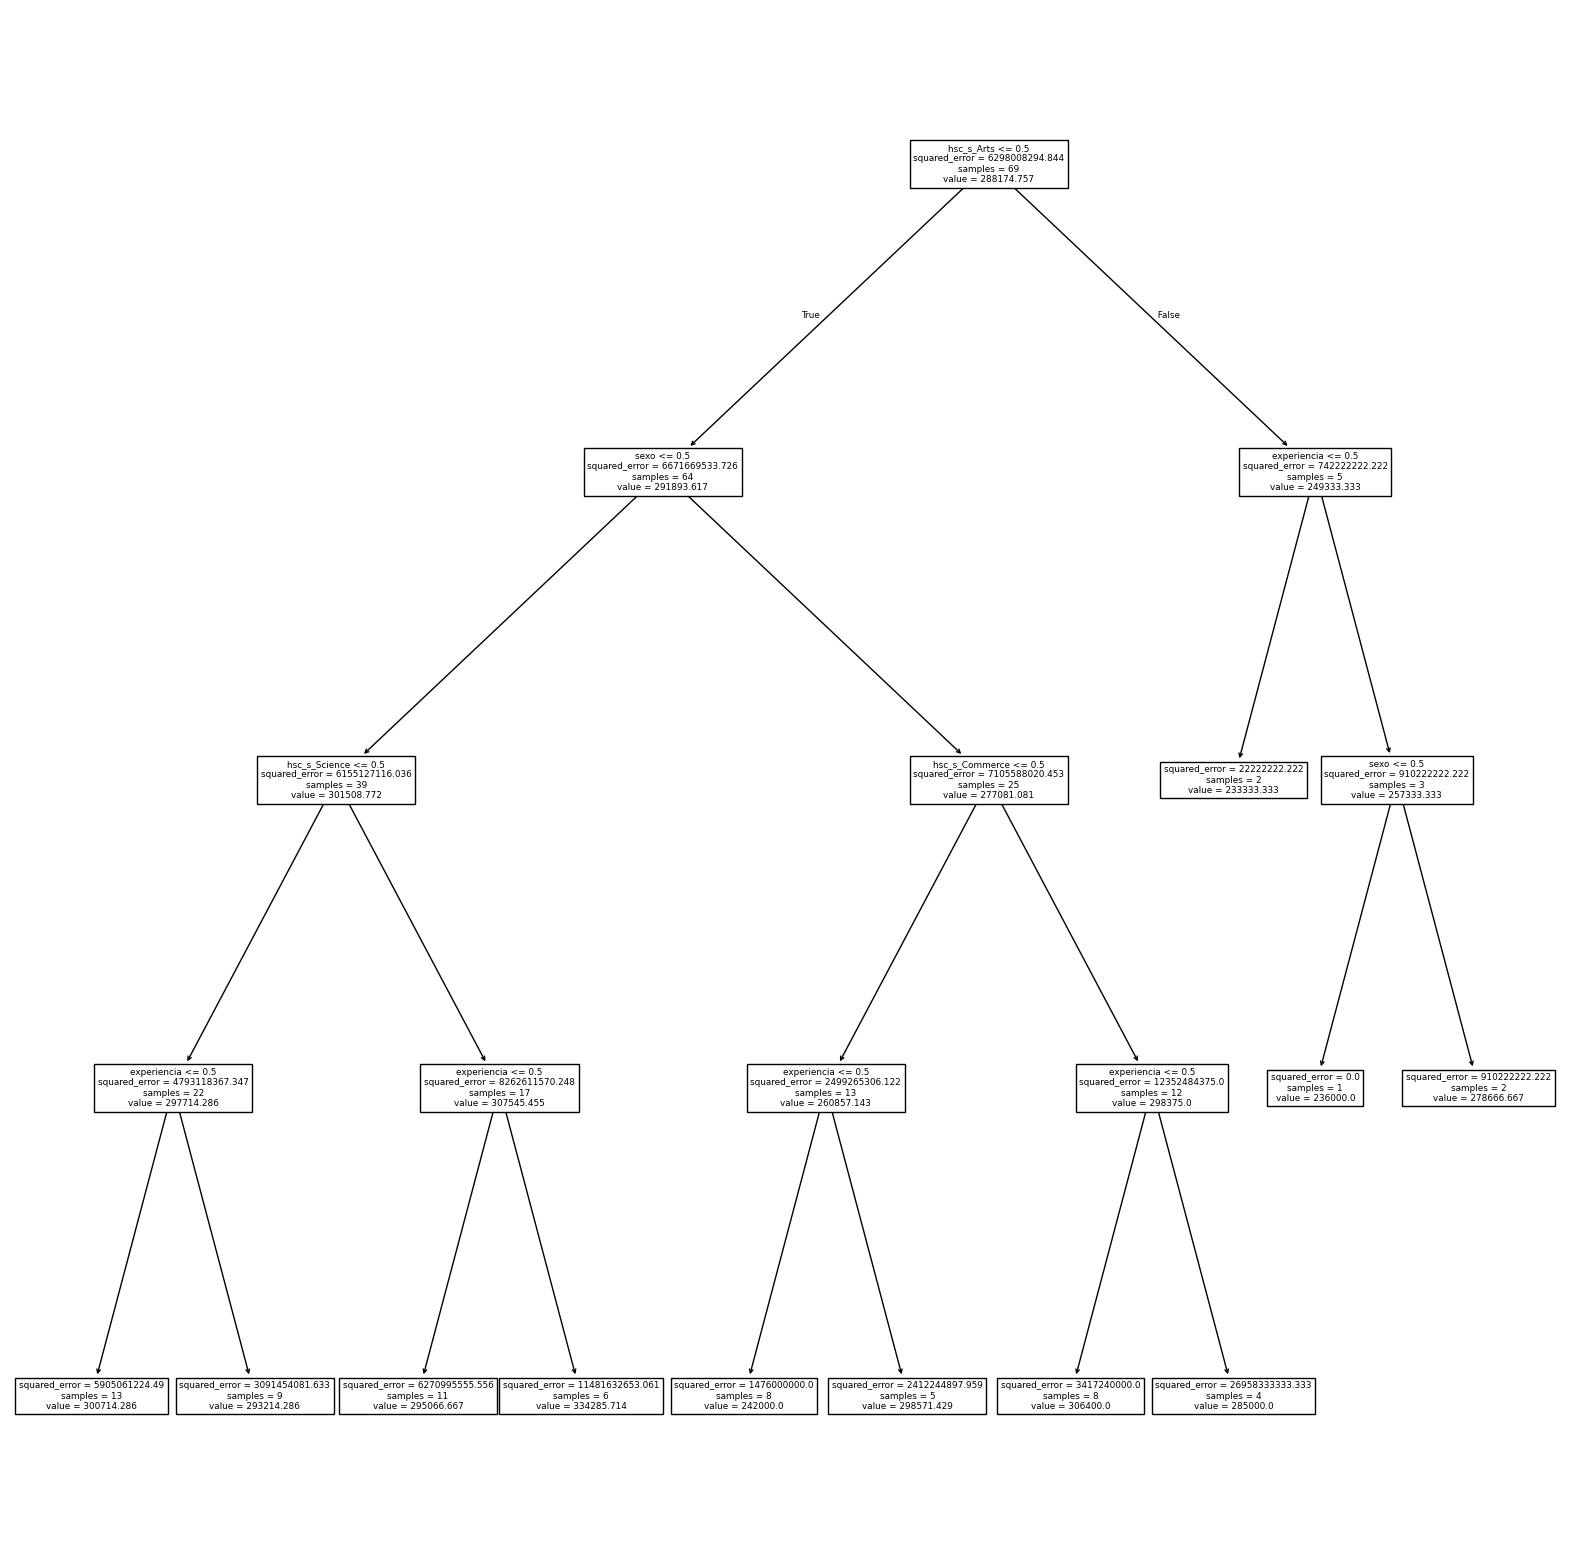

In [106]:
from sklearn import tree

features = list(x.columns)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(randomdoregressor.estimators_[0], feature_names=features, class_names=randomdoregressor.__class__)

Text(0, 0.5, 'IDHM estimado')

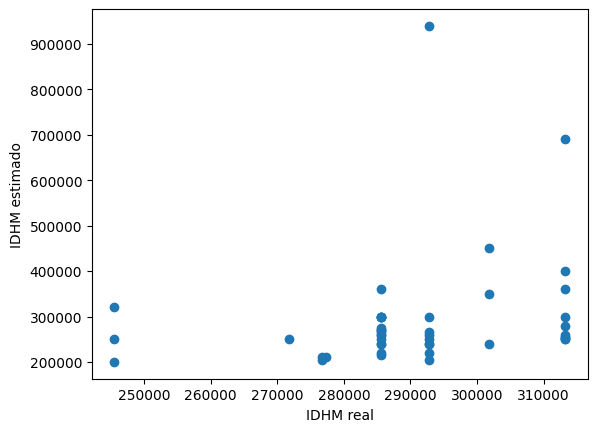

In [109]:
import matplotlib.pyplot as plt
plt.scatter(predicaoregressor, y_test)
plt.xlabel('IDHM real')
plt.ylabel('IDHM estimado')